In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open('../Downloads/2004_daily_001grd/20040102.tif', gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [ ]:
import numpy as np
(n, bins) = np.histogram(arr, bins=50, density=True) 
plt.plot(.5 * (bins[1:] + bins[:-1]), n)

In [ ]:
dataset.RasterCount, dataset.RasterXSize, dataset.RasterYSize

In [ ]:
band.GetStatistics(True, True)

In [ ]:
print(arr)

In [ ]:
def make_zero(num: int):
    if num != 255:
        return 0
    return num

def get_bloom_pixels(bloom_array):
    # convert to np array
    np_bloom_array = np.array(bloom_array)
    return np.right_shift(np_bloom_array, 7)

In [ ]:
test_2D_array = np.array([[1,2,3,255],[1,2,255,3],[1,255,2,3],[255,1,2,3]])
test_2D_array = np.right_shift(test_2D_array, 7)
print(test_2D_array)

In [ ]:
bloom_only = get_bloom_pixels(arr)
plt.imshow(bloom_only)

In [ ]:
dataset = gdal.Open('../Downloads/2004_daily_001grd/20040101.tif', gdal.GA_ReadOnly) 
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import datetime
folder_dir = "../Downloads/"
end_date = datetime.date(2004,1,31)
curr_date = datetime.date(2004,1,1)

init_array = np.zeros((18000, 36000))

while curr_date <= end_date:
    folder_path = f"{curr_date.year}_daily_001grd/"
    formatted_date = curr_date.strftime("%Y%m%d")
    file_location = f"{formatted_date}.tif"
    try:
        dataset = gdal.Open(f"{folder_dir}{folder_path}{file_location}", gdal.GA_ReadOnly) 
        band = dataset.GetRasterBand(1)
        arr = band.ReadAsArray()
        bloom_array = get_bloom_pixels(arr)
        init_array = init_array + bloom_array
    except:
        print(f"no directory: {folder_dir}{folder_path}{file_location}")
        curr_date += datetime.timedelta(days=1)
    curr_date += datetime.timedelta(days=1)

plt.imshow(init_array)

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))
pos = ax.imshow(init_array, cmap="ocean_r")
fig.colorbar(pos, ax=ax, shrink=0.3)

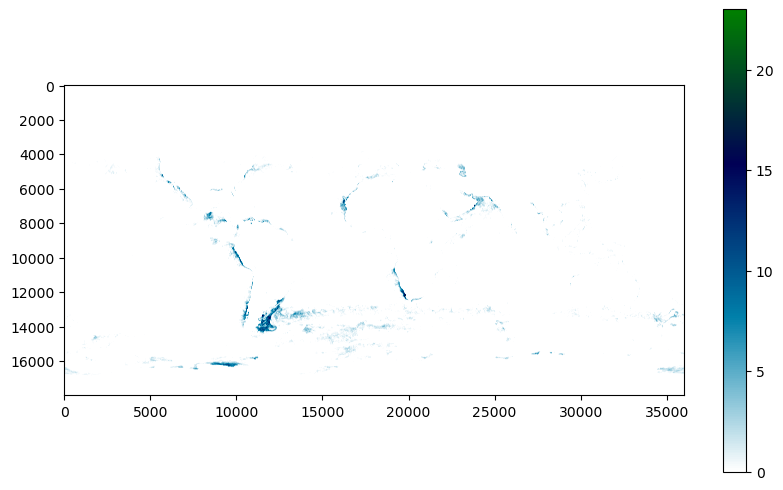

In [1]:
import dill
import matplotlib.pyplot as plt
big_boi20131 = dill.load(open("big_boi20131.pickle", "rb"))
fig, ax = plt.subplots(figsize=(10,20))
pos = ax.imshow(big_boi20131, cmap="ocean_r")
fig.colorbar(pos, ax=ax, shrink=0.3)

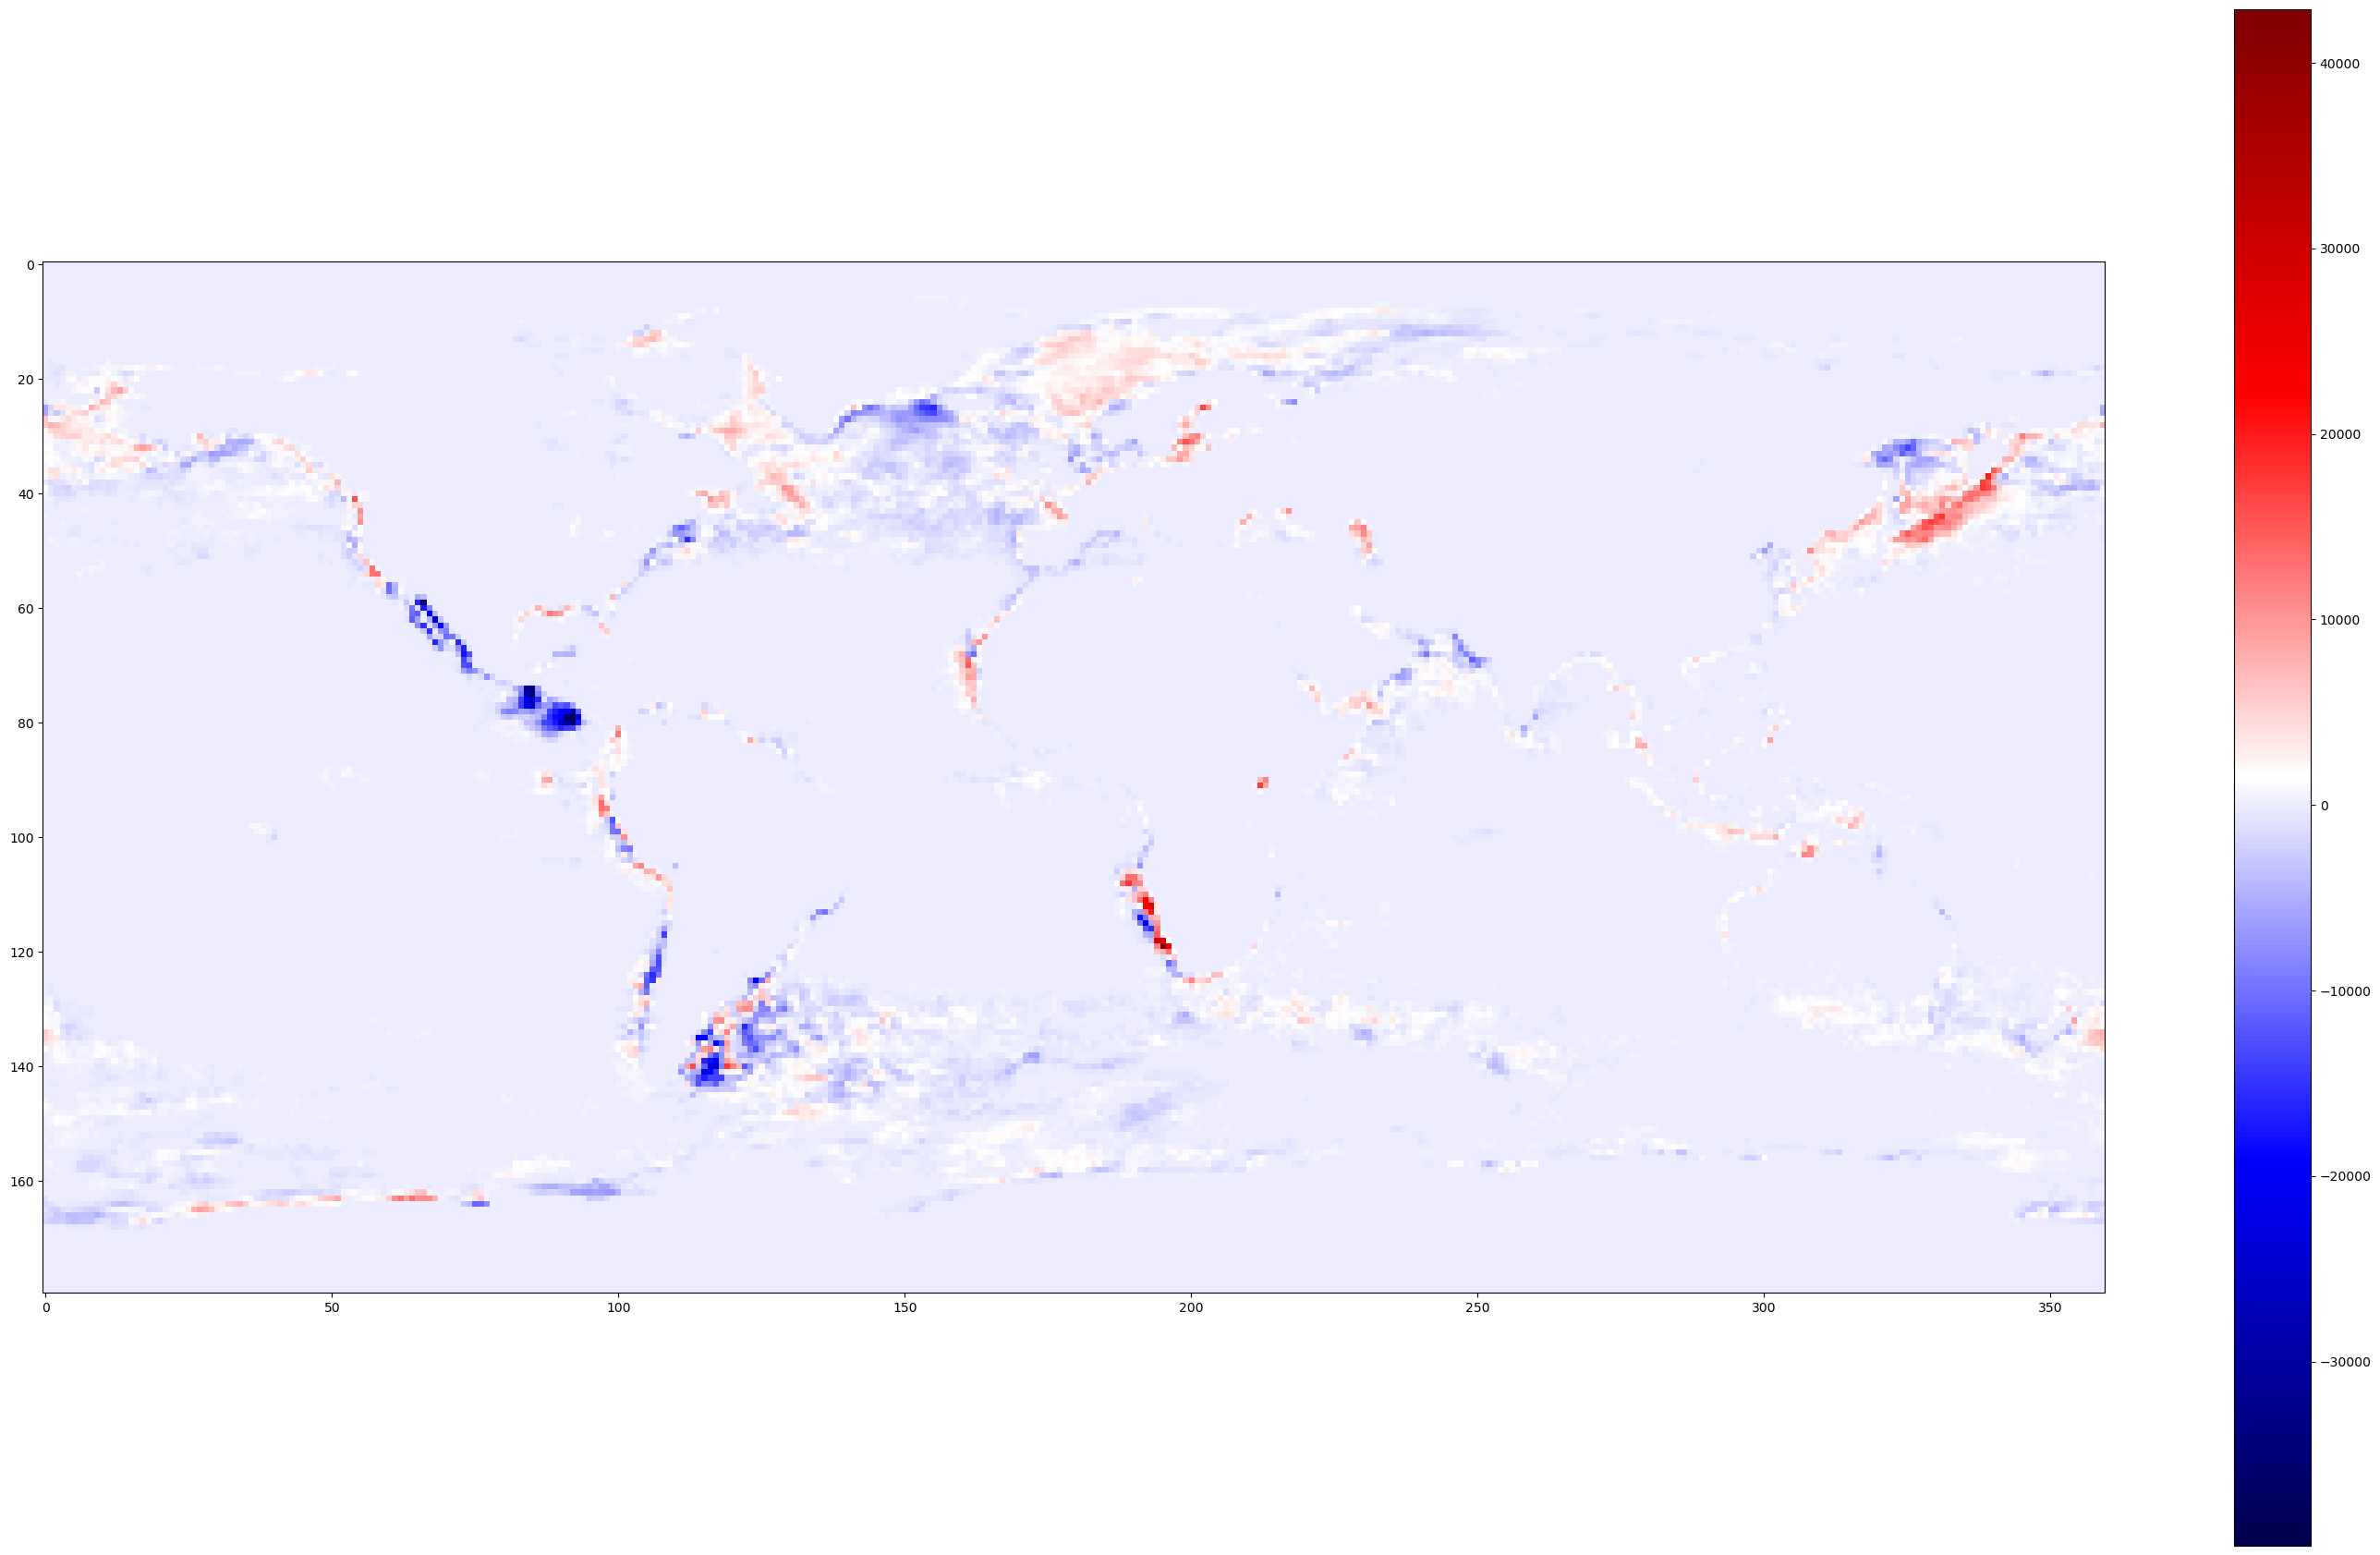

In [6]:
import numpy as np
import matplotlib.pyplot as plt
init_array = np.load(open("linear_regress.pickle", "rb"), allow_pickle=True)
fig, ax = plt.subplots(figsize=(36,72))
pos = ax.imshow(init_array, cmap="seismic")
fig.colorbar(pos, ax=ax, shrink=0.3)